# Project 2 - Two-mode Network Dataset (DATA 620)

### Topic: Baseball player steroid use
### Authors: John Mazon, LeTicia Cancel, Bharani Nitala
Video: https://www.youtube.com/watch?v=WikEuC-lW7k

In [54]:
# Import Libraries
import pandas as pd
import numpy as np
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import matplotlib
from operator import itemgetter

### Description of Dataset:

Two networks representing steroid use among baseball players. First, a bipartite network of players and their steroid providers (of illegal performance-enhancing substances). Second, a one-mode projection of players, which are linked if they have a common
supplier.

The List of Major League Baseball players named in the Mitchell Report includes active and former Major League players as well as free agents. The Mitchell Report is the result of former US Senator George J. Mitchell's (D–ME) 20-month investigation into performance-enhancing drug use in Major League Baseball (MLB). It was released December 13, 2007.

The following is a list of the Major League Baseball players named in the Mitchell Report.[1][2][3][4][5] Inclusion on the list does not necessarily mean the player was involved in illegal activity. In some instances, insufficient evidence was provided to draw a conclusion, and some players were mentioned in other contexts.

### Background info
Social network analysis [SNA] is the mapping and measuring of relationships and flows between people, groups, organizations, computers, URLs, and other connected information/knowledge entities. The nodes in the network are the people and groups while the links show relationships or flows between the nodes. SNA provides both a visual and a mathematical analysis of human relationships. 

When the Mitchell Report, on steroid use in Major League Baseball [MLB], was published people were surprised at both the number and names of those who were mentioned. The diagram below shows a network map created from data found in the Mitchell Report. Baseball players are shown as well as those who were found to be providers of steroids and other illegal performance enhancing substances appear. The links reveal the flow of chemicals -- from providers to players.



### Hypothesis:
Using various measures in networkx we will prove Kirk Radomski to be the most influential in the network

# Section 1 - importing the data

In [55]:
#reading csv files for the edges and nodes information
df_edges = pd.read_csv('edges.csv')
df_nodes = pd.read_csv('nodes.csv')

In [56]:
# we view all the information available in our nodes dataframe
df_nodes

,# index,name,_pos
0,0,BALCO,"array([ 0.42916385, -1.06252603])"
1,1,Greg_Anderson,"array([ 0.92099285, -0.80835392])"
2,2,Palm_Beach_Rejuvenation_Centre,"array([-0.4604673 , -2.28633679])"
3,3,New_Hope_Health_Centre,"array([ 0.97088245, -4.86546354])"
4,4,Signature_Pharmacy,"array([-0.30669722, -3.17679839])"
...,...,...,...
79,79,Mike_Bell,"array([ 2.47275041, -3.19814548])"
80,80,Bart_Miadich,"array([ 2.13836021, -2.33889511])"
81,81,Jim_Parque,"array([ 2.71360296, -3.34106552])"
82,82,Phil_Hiatt,"array([ 2.92429591, -3.42093518])"


### Influence of providers/trainers on MLB stars

The BALCO scandal was a scandal involving the use of banned, performance-enhancing substances by professional athletes. The Bay Area Laboratory Co-operative (BALCO) was a San Francisco Bay Area business which supplied anabolic steroids to professional athletes. The incident surrounds a 2002 US federal government investigation of the laboratory.

According to the Mitchell Report on doping in baseball, the Palm Beach Rejuvenation Center supplied human growth hormone and steroids to several baseball players, including Cleveland Indians pitcher Paul Byrd, who bought nearly $25,000 worth of HGH in 13 transactions between August 2002 and January 2005.

Greg F. Anderson (born February 1966) is an American personal trainer, best known for his work with baseball player Barry Bonds, and links with BALCO.
Anderson allegedly began providing Bonds with performance-enhancing drugs in 1998. He was also linked in this regard to both Jason Giambi and Gary Sheffield, through his connections with Bonds. Despite this information, the San Francisco Giants, allegedly in order to appease Bonds, did not bar Anderson from Giants' facilities. On July 15, 2005, Anderson, in a deal with federal prosecutors, pleaded guilty to conspiracy to distribute steroids and to money-laundering.On October 18, 2005, he was sentenced by U.S. District Court Judge Susan Illston to three months in prison and three months' home confinement.




In [57]:

providers = ["BALCO", "Greg_Anderson", "Palm_Beach_Rejuvenation_Centre", 'New_Hope_Health_Centre', 'Signature_Pharmacy',  'American_Pharmaceutical_Group',
            'Health_Rejuvenation_Centre', 'Applied_Pharmacy_Services', 'Arizona_AntiAging_Clinic', 'Health_Watch_Clinic', 'Glenallen_Hill']
players = list( set(list(df_nodes.iloc[:, 1])) - set(providers) )

In [58]:
# we are able to view the top entries of our edges dataframe
df_edges.head()

,# source,target
0,12,0
1,13,0
2,14,0
3,14,1
4,15,0


In [59]:
#initialize graph
G = nx.Graph()
print(df_edges)


#we print the df_edges to visualize better the data and to see who is connected to who

    # source   target
0         12        0
1         13        0
2         14        0
3         14        1
4         15        0
..       ...      ...
79        79       11
80        80       11
81        81       11
82        82       11
83        83       11

[84 rows x 2 columns]


In [60]:
#find edges to demonstrate the data of connections between nodes
def ObtainEdges(df):
    edges_list = [];
    for index, info in df.iterrows():
        edges_list.append((info[0], info[1]))

    return edges_list

In [61]:
#obtaining info from df_edges to input into edges_list
edges_list = ObtainEdges(df_edges)

In [62]:
#print out a portion of the edges list
edges_list[0:12]

[(12, 0),
 (13, 0),
 (14, 0),
 (14, 1),
 (15, 0),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 0),
 (19, 1),
 (20, 0)]

In [63]:
#print out a portion of the df_nodes
#we notices Kirk Radomsk is within the dataframe with index #11
df_nodes[0:12]

,# index,name,_pos
0,0,BALCO,"array([ 0.42916385, -1.06252603])"
1,1,Greg_Anderson,"array([ 0.92099285, -0.80835392])"
2,2,Palm_Beach_Rejuvenation_Centre,"array([-0.4604673 , -2.28633679])"
3,3,New_Hope_Health_Centre,"array([ 0.97088245, -4.86546354])"
4,4,Signature_Pharmacy,"array([-0.30669722, -3.17679839])"
5,5,American_Pharmaceutical_Group,"array([ 2.95233045, -1.87045357])"
6,6,Health_Rejuvenation_Centre,"array([-0.45673428, -3.93778089])"
7,7,Applied_Pharmacy_Services,"array([ 0.10571343, -3.51182852])"
8,8,Arizona_AntiAging_Clinic,"array([ 0.30421134, -2.92204833])"
9,9,Health_Watch_Clinic,"array([-0.06342055, -3.96214378])"


In [64]:
# find nodes by using obtainAttr () which retrieves or creates the element's attribute
def ObtainAttr(df):
    attr_dict = dict()
    for index, info in df.iterrows():
        attr_dict[info[0]] = info[1];
    return attr_dict

In [65]:
attr_dict= ObtainAttr(df_nodes)

Below is the value combinations of nodes, relating to players and providers

In [66]:
# print first 10 nodes
list(attr_dict.items())[1:12]

[(1, 'Greg_Anderson'),
 (2, 'Palm_Beach_Rejuvenation_Centre'),
 (3, 'New_Hope_Health_Centre'),
 (4, 'Signature_Pharmacy'),
 (5, 'American_Pharmaceutical_Group'),
 (6, 'Health_Rejuvenation_Centre'),
 (7, 'Applied_Pharmacy_Services'),
 (8, 'Arizona_AntiAging_Clinic'),
 (9, 'Health_Watch_Clinic'),
 (10, 'BrianMcNamee'),
 (11, 'Kirk_Radomski')]

# Section 2 - Part 1 - bipartite networks

To understand networks and their participants, we evaluate the location and grouping of nodes in the network. These measures give us insight into the various roles and groupings in a network -- who are the connectors, bridges, isolates, where are the clusters and who is in them, who is in the core of the network





In [67]:
names_to_id = dict( [(v, k) for (k, v) in attr_dict.items()] )

In [68]:
#Creating a two mode network i.e Bipartite Networks from the above nodes and edges.
#node_1 = list(attr_dict.keys())
#node_2 = list(attr_dict.values())
node_1 = [(names_to_id[k], {"label" : k}) for k in players]
node_2 = [(names_to_id[k], {"label" : k}) for k in providers]
G.add_nodes_from(node_1, bipartite=0)
G.add_nodes_from(node_2, bipartite=1)
# G.add_edges_from(edges_list)
# G.add_nodes_from(attr_dict.values())
G.add_edges_from(edges_list)

In [69]:
len(node_1)

73

In [70]:
#printing the values in G.nodes to see what the data looks like
G.nodes(data=True)

NodeDataView({69: {'bipartite': 0, 'label': 'Miguel_Tejada'}, 14: {'bipartite': 0, 'label': 'Jason_Giambi'}, 44: {'bipartite': 0, 'label': 'Jerry_HarrisonJr'}, 22: {'bipartite': 0, 'label': 'Matt_Williams'}, 60: {'bipartite': 0, 'label': 'Lenny_Dykstra'}, 30: {'bipartite': 0, 'label': 'Steve_Woodward'}, 47: {'bipartite': 0, 'label': 'David_Segul'}, 79: {'bipartite': 0, 'label': 'Mike_Bell'}, 27: {'bipartite': 0, 'label': 'Jason_Grimsley'}, 24: {'bipartite': 0, 'label': 'Paul_Byrd'}, 19: {'bipartite': 0, 'label': 'Barry_Bonds'}, 33: {'bipartite': 0, 'label': 'Jose_Canseco'}, 39: {'bipartite': 0, 'label': 'Andy_Pettittle'}, 48: {'bipartite': 0, 'label': 'Matt_Franco'}, 45: {'bipartite': 0, 'label': 'Jason_Christiansen'}, 23: {'bipartite': 0, 'label': 'Daren_Holmes'}, 76: {'bipartite': 0, 'label': 'Hal_Morris'}, 67: {'bipartite': 0, 'label': 'David_Justice'}, 37: {'bipartite': 0, 'label': 'Chuck_Knoblauch'}, 40: {'bipartite': 0, 'label': 'Brian_Roberts'}, 12: {'bipartite': 0, 'label': 'Vi

In [71]:
#printing the values in edges_list to see what the data looks like
print(edges_list)

[(12, 0), (13, 0), (14, 0), (14, 1), (15, 0), (15, 1), (16, 1), (17, 1), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1), (21, 1), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (27, 4), (28, 3), (29, 3), (30, 4), (31, 4), (31, 7), (32, 4), (32, 7), (32, 8), (33, 4), (33, 6), (33, 7), (33, 9), (34, 7), (35, 5), (36, 6), (37, 10), (38, 10), (39, 10), (40, 11), (41, 11), (42, 11), (43, 11), (44, 5), (44, 11), (45, 11), (46, 11), (47, 11), (48, 11), (49, 11), (50, 11), (51, 11), (52, 11), (53, 11), (54, 11), (55, 11), (56, 11), (57, 11), (58, 11), (59, 11), (60, 11), (61, 11), (62, 11), (63, 11), (64, 11), (65, 11), (66, 11), (67, 11), (68, 11), (69, 11), (70, 11), (71, 11), (72, 11), (73, 11), (74, 11), (75, 11), (76, 11), (77, 11), (78, 11), (79, 11), (80, 11), (81, 11), (82, 11), (83, 11)]


### The story behind Kirk Radomski and distribution of substances

Kirk J. Radomski (born 1969) is a former batboy and clubhouse employee, colloquially known by players as Murdock, for the New York Mets of Major League Baseball from 1985 to 1995. On April 27, 2007, he pleaded guilty in United States district court to money laundering and illegal distribution of anabolic steroids, human growth hormone, Clenbuterol, amphetamines and other drugs to "dozens of current and former Major League Baseball players, and associates, on teams throughout Major League Baseball." Radomski faced a maximum sentence of 25 years in prison and a 500,000 dollar fine. 
He was sentenced to five years probation and ordered to pay a fine of $18,575,due to his cooperation with the federal government and the Mitchell Report.


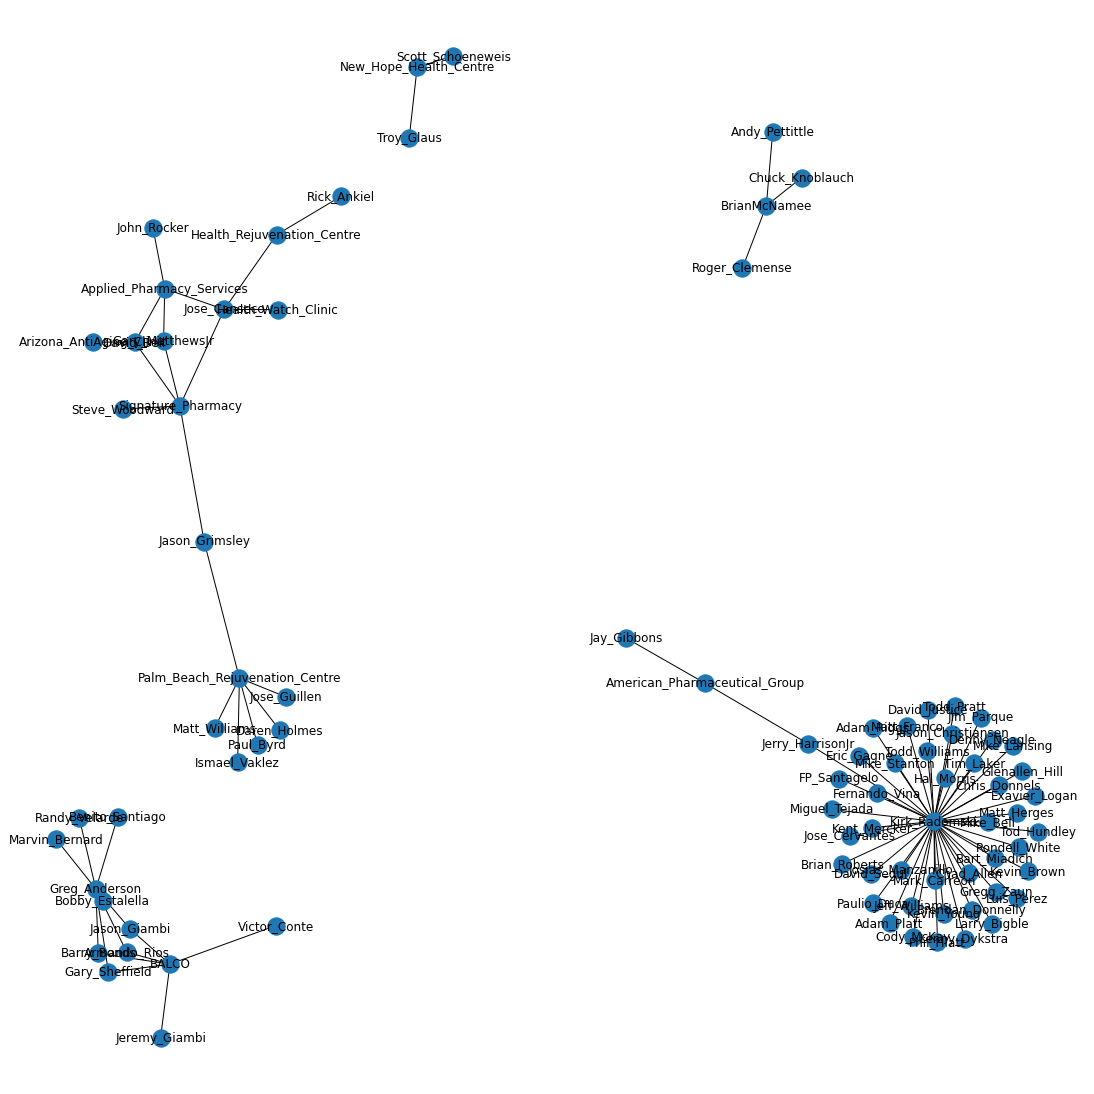

In [72]:
#using of the matplotlib pyplot to draw out our Graph along with all visible subgraphs/connections
plt.figure(figsize=(15,15))
nx.draw(G, labels=attr_dict, with_labels=True, pos=nx.fruchterman_reingold_layout(G, k =0.35, iterations =120 ) )

In [73]:
# add name to network
G=nx.relabel_nodes(G,attr_dict)

Below we are able to once again confirm by degree order that Kirk Radomski is first on the list with 44

In [74]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
print(G.nodes['Kirk_Radomski'])



{'bipartite': 0, 'label': 'Kirk_Radomski', 'degree': 44}


In [113]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Kirk_Radomski', 44)
('Greg_Anderson', 8)
('BALCO', 6)
('Palm_Beach_Rejuvenation_Centre', 6)
('Signature_Pharmacy', 5)


# Section 2 - Part 2 - bipartite networks using subgraph[0]

A subgraph is a subset of the nodes of a network, and all of the edges linking these nodes. Any group of nodes can form a subgraph—and further down we will describe several interesting ways to use this.

Component subgraphs (or simply components) are portions of the network that are disconnected from each other. 
Many real networks have multiple components.

NetworkX has a function for isolating connected components (connected_component_subgraphs(e)); the function returns an array of Graph objects corresponding to each of the connected components:



# we see S[0] subgraph has the highest length value

In [76]:
#finding every connected graphs in the whole network
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [77]:
#we see the length of S, which shows 5 subgraph
len(S)

5

In [78]:
#by using this analysis of the subgraph with the most edges, we see all the connections sourcing to Kirk Radomski
s = S[0].edges()
print(s)

[('Miguel_Tejada', 'Kirk_Radomski'), ('Jerry_HarrisonJr', 'American_Pharmaceutical_Group'), ('Jerry_HarrisonJr', 'Kirk_Radomski'), ('Lenny_Dykstra', 'Kirk_Radomski'), ('David_Segul', 'Kirk_Radomski'), ('Mike_Bell', 'Kirk_Radomski'), ('Matt_Franco', 'Kirk_Radomski'), ('Jason_Christiansen', 'Kirk_Radomski'), ('Hal_Morris', 'Kirk_Radomski'), ('David_Justice', 'Kirk_Radomski'), ('Brian_Roberts', 'Kirk_Radomski'), ('Todd_Pratt', 'Kirk_Radomski'), ('Luis_Perez', 'Kirk_Radomski'), ('Kevin_Brown', 'Kirk_Radomski'), ('Mike_Stanton', 'Kirk_Radomski'), ('Mike_Lansing', 'Kirk_Radomski'), ('Denny_Neagle', 'Kirk_Radomski'), ('Cody_McKay', 'Kirk_Radomski'), ('Chad_Allen', 'Kirk_Radomski'), ('Todd_Williams', 'Kirk_Radomski'), ('Bart_Miadich', 'Kirk_Radomski'), ('Larry_Bigble', 'Kirk_Radomski'), ('Matt_Herges', 'Kirk_Radomski'), ('Chris_Donnels', 'Kirk_Radomski'), ('Adam_Platt', 'Kirk_Radomski'), ('Rondell_White', 'Kirk_Radomski'), ('Eric_Gagne', 'Kirk_Radomski'), ('Paulio_Duca', 'Kirk_Radomski'), ('Br

In [79]:
# we see our subgraph[0] is TRUE when finding out if connected
nx.is_connected(S[0])

True

In [80]:
#length of all the subgraphs in dataset, we see [0] is the highest value
[len(x) for x in S]

[47, 12, 18, 4, 3]

In [81]:
#once again we are able to see all the connections to Kirk Radomski
s_1 = [list(l) for l in s]
s_1

[['Miguel_Tejada', 'Kirk_Radomski'],
 ['Jerry_HarrisonJr', 'American_Pharmaceutical_Group'],
 ['Jerry_HarrisonJr', 'Kirk_Radomski'],
 ['Lenny_Dykstra', 'Kirk_Radomski'],
 ['David_Segul', 'Kirk_Radomski'],
 ['Mike_Bell', 'Kirk_Radomski'],
 ['Matt_Franco', 'Kirk_Radomski'],
 ['Jason_Christiansen', 'Kirk_Radomski'],
 ['Hal_Morris', 'Kirk_Radomski'],
 ['David_Justice', 'Kirk_Radomski'],
 ['Brian_Roberts', 'Kirk_Radomski'],
 ['Todd_Pratt', 'Kirk_Radomski'],
 ['Luis_Perez', 'Kirk_Radomski'],
 ['Kevin_Brown', 'Kirk_Radomski'],
 ['Mike_Stanton', 'Kirk_Radomski'],
 ['Mike_Lansing', 'Kirk_Radomski'],
 ['Denny_Neagle', 'Kirk_Radomski'],
 ['Cody_McKay', 'Kirk_Radomski'],
 ['Chad_Allen', 'Kirk_Radomski'],
 ['Todd_Williams', 'Kirk_Radomski'],
 ['Bart_Miadich', 'Kirk_Radomski'],
 ['Larry_Bigble', 'Kirk_Radomski'],
 ['Matt_Herges', 'Kirk_Radomski'],
 ['Chris_Donnels', 'Kirk_Radomski'],
 ['Adam_Platt', 'Kirk_Radomski'],
 ['Rondell_White', 'Kirk_Radomski'],
 ['Eric_Gagne', 'Kirk_Radomski'],
 ['Paulio_Du

In [82]:
s_1 = [tuple(l) for l in s_1]
s_1

[('Miguel_Tejada', 'Kirk_Radomski'),
 ('Jerry_HarrisonJr', 'American_Pharmaceutical_Group'),
 ('Jerry_HarrisonJr', 'Kirk_Radomski'),
 ('Lenny_Dykstra', 'Kirk_Radomski'),
 ('David_Segul', 'Kirk_Radomski'),
 ('Mike_Bell', 'Kirk_Radomski'),
 ('Matt_Franco', 'Kirk_Radomski'),
 ('Jason_Christiansen', 'Kirk_Radomski'),
 ('Hal_Morris', 'Kirk_Radomski'),
 ('David_Justice', 'Kirk_Radomski'),
 ('Brian_Roberts', 'Kirk_Radomski'),
 ('Todd_Pratt', 'Kirk_Radomski'),
 ('Luis_Perez', 'Kirk_Radomski'),
 ('Kevin_Brown', 'Kirk_Radomski'),
 ('Mike_Stanton', 'Kirk_Radomski'),
 ('Mike_Lansing', 'Kirk_Radomski'),
 ('Denny_Neagle', 'Kirk_Radomski'),
 ('Cody_McKay', 'Kirk_Radomski'),
 ('Chad_Allen', 'Kirk_Radomski'),
 ('Todd_Williams', 'Kirk_Radomski'),
 ('Bart_Miadich', 'Kirk_Radomski'),
 ('Larry_Bigble', 'Kirk_Radomski'),
 ('Matt_Herges', 'Kirk_Radomski'),
 ('Chris_Donnels', 'Kirk_Radomski'),
 ('Adam_Platt', 'Kirk_Radomski'),
 ('Rondell_White', 'Kirk_Radomski'),
 ('Eric_Gagne', 'Kirk_Radomski'),
 ('Paulio_Du

In [83]:
#using our Dict, we are conveniently able to see all the connections/edges from source Kirk Radomski
def replace(list, dictionary):
    return [attr_dict.get(item, item) for item in list]
d = replace(S[0].nodes(),attr_dict)
print(d)

['Miguel_Tejada', 'Jerry_HarrisonJr', 'Lenny_Dykstra', 'David_Segul', 'Mike_Bell', 'Matt_Franco', 'Jason_Christiansen', 'Hal_Morris', 'David_Justice', 'Brian_Roberts', 'Todd_Pratt', 'Luis_Perez', 'Kevin_Brown', 'Mike_Stanton', 'Mike_Lansing', 'Denny_Neagle', 'Cody_McKay', 'Chad_Allen', 'Todd_Williams', 'Bart_Miadich', 'Larry_Bigble', 'Matt_Herges', 'Chris_Donnels', 'Adam_Platt', 'Rondell_White', 'Eric_Gagne', 'Paulio_Duca', 'Brendan_Donnelly', 'Mark_Carreon', 'Fernando_Vina', 'Tim_Laker', 'Kevin_Young', 'Phil_Hiatt', 'Exavier_Logan', 'Kirk_Radomski', 'Tod_Hundley', 'Jim_Parque', 'Jose_Cervantes', 'Kent_Mercker', 'Josias_Manzanillo', 'Jeff_Williams', 'Gregg_Zaun', 'Jay_Gibbons', 'FP_Santagelo', 'Adam_Riggs', 'American_Pharmaceutical_Group', 'Glenallen_Hill']


In [84]:
S[0].clear()

In [85]:
S[0].nodes()

NodeView(())

In [86]:
S[0].edges()

EdgeView([])

In [87]:
S[0].add_nodes_from(d)

In [88]:
S[0].add_edges_from(s_1)

In [89]:
# we see listed out all the nodes contain in the subgraph[0]
S[0].nodes()

NodeView(('Miguel_Tejada', 'Jerry_HarrisonJr', 'Lenny_Dykstra', 'David_Segul', 'Mike_Bell', 'Matt_Franco', 'Jason_Christiansen', 'Hal_Morris', 'David_Justice', 'Brian_Roberts', 'Todd_Pratt', 'Luis_Perez', 'Kevin_Brown', 'Mike_Stanton', 'Mike_Lansing', 'Denny_Neagle', 'Cody_McKay', 'Chad_Allen', 'Todd_Williams', 'Bart_Miadich', 'Larry_Bigble', 'Matt_Herges', 'Chris_Donnels', 'Adam_Platt', 'Rondell_White', 'Eric_Gagne', 'Paulio_Duca', 'Brendan_Donnelly', 'Mark_Carreon', 'Fernando_Vina', 'Tim_Laker', 'Kevin_Young', 'Phil_Hiatt', 'Exavier_Logan', 'Kirk_Radomski', 'Tod_Hundley', 'Jim_Parque', 'Jose_Cervantes', 'Kent_Mercker', 'Josias_Manzanillo', 'Jeff_Williams', 'Gregg_Zaun', 'Jay_Gibbons', 'FP_Santagelo', 'Adam_Riggs', 'American_Pharmaceutical_Group', 'Glenallen_Hill'))

In [90]:
##[(n, attr_dict[n]) for n in S[0].nodes()]

In [91]:
def get_color(k):
    if k == 0:
        return("blue")
    if k == 1:
        return("red")

By looking at the map above, it appears that the players taking steroids may be connected to each other. The hubs in the network above are the drug providers -- they appear to be the connectors who are controlling the process. We need to see other pictures/maps to get a better grasp of what is really happening. We take several views/pictures of social systems for the same since multiple views provide multiple insights.

Through player trades and free-agent signings, MLB does a good job of building multiple overlapping social networks. With players constantly changing teams, they form new links with new teammates, while maintaining many of their old ties to former teammates. This activity quickly creates a densely interconnected social network 

<ipython-input-93-9053db845d41>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


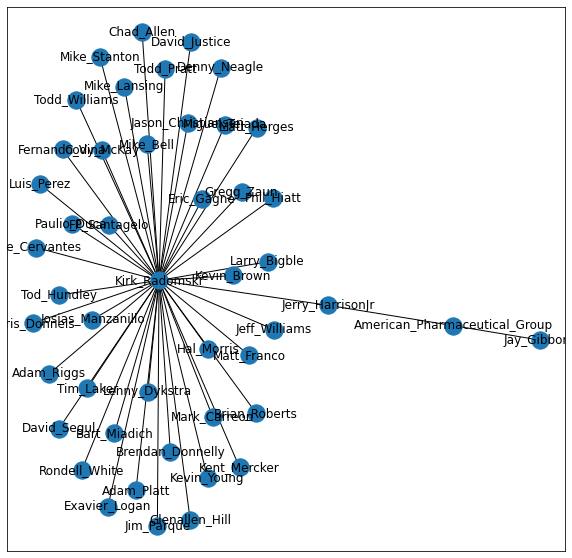

In [93]:
nx.draw_networkx(S[0],with_labels=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
fig.show()

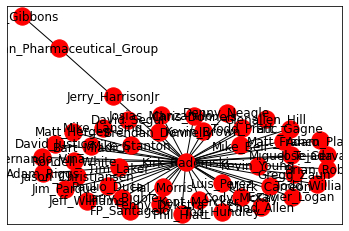

In [94]:
#we created a subgraph_choice iteration which always you to change the value of the subgraph and see it's members
subgraph_choice = 0
col_map = [get_color(k) for k in nx.get_node_attributes(S[subgraph_choice], "bipartite").values()]
nx.draw_networkx(S[subgraph_choice], with_labels=True, node_color='r')
#fig1 = matplotlib.pyplot.gcf()
#fig1.set_size_inches(15, 20)
#fig1.show()

# Section 3 - part 2 - subnetworks analysis centrality measures

# subgraph "S[0] " analysis 

In graph theory and computer science, an adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph. In the special case of a finite simple graph, the adjacency matrix is a-matrix with zeros on its diagonal.

In [96]:
# Representing the two mode network in matrix
A = nx.adjacency_matrix(S[0])
A

<47x47 sparse matrix of type '<class 'numpy.intc'>'
	with 92 stored elements in Compressed Sparse Row format>

<ipython-input-97-00f86e41663b>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


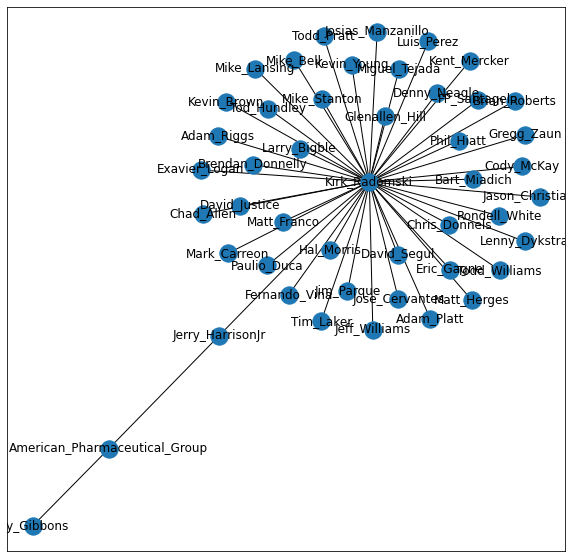

In [97]:
# labeling every islands on the two mode network
def label_island(lst):
    label =[]
    for i in lst:
        a = [n for n in G.neighbors(i)]
        label.append(a)
    return label

label_island(S[0].nodes)

nx.draw_networkx(S[0],with_labels=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
fig.show()

In [98]:
# labeling every islands on the two mode network
def label_island(lst):
    label =[]
    for i in lst:
        b = [n for n in G.neighbors(i)]
        label.append(b)
    return label

In [99]:
#labeling the island for subgraph[1]
label_island(S[0].nodes)

[['Kirk_Radomski'],
 ['American_Pharmaceutical_Group', 'Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Kirk_Radomski'],
 ['Miguel_Tejada',
  'Jerry_HarrisonJr',
  'Lenny_Dykstra',
  'David_Segul',
  'Mike_Bell',
  'Matt_Franco',
  'Jason_Christiansen',
  'Hal_Morris',
  'David_Justice',
  'Brian_Roberts',
  'Todd_Pratt',
  'Luis_Perez',
  'Kevin_Brown',
  'Mike_Stanton',
  'Mike_Lansing',
  'Denny_Neagle

<ipython-input-100-9053db845d41>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


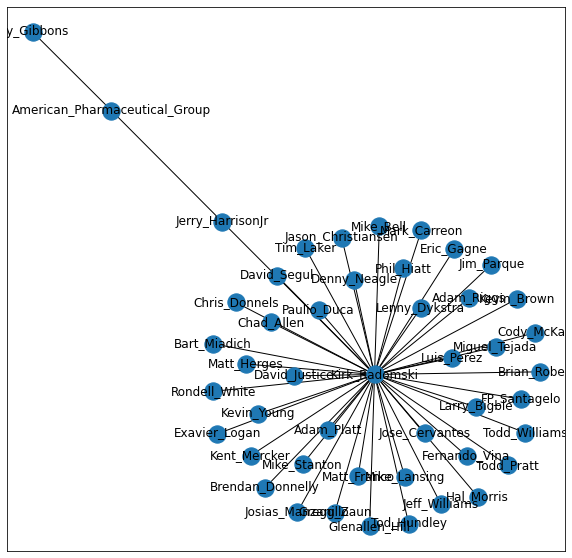

In [100]:
nx.draw_networkx(S[0],with_labels=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
fig.show()

In [101]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 84\nNumber of edges: 84\nAverage degree:   2.0000'

In [102]:
#most_influential
degree_dict = nx.degree_centrality(G)
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by degree centrality:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree centrality:
('Kirk_Radomski', 0.5301204819277109)
('Greg_Anderson', 0.0963855421686747)
('BALCO', 0.07228915662650603)
('Palm_Beach_Rejuvenation_Centre', 0.07228915662650603)
('Signature_Pharmacy', 0.060240963855421686)


In [114]:
#closeness centrality
closeness_dict = nx.closeness_centrality(G)
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by  closeness:")
for d in sorted_closeness[:5]:
    print(d)

Top 5 nodes by  closeness:
('Kirk_Radomski', 0.5202852225227441)
('Jerry_HarrisonJr', 0.28326639892904953)
('Miguel_Tejada', 0.27121250961291976)
('Lenny_Dykstra', 0.27121250961291976)
('David_Segul', 0.27121250961291976)


In [104]:
#betweeness centrality
betweenness_dict = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by betweenness centrality:")
for d in sorted_betweenness[:5]:
    print(d)

Top 5 nodes by betweenness centrality:
('Kirk_Radomski', 0.3032618277990009)
('Jerry_HarrisonJr', 0.025859535703790775)
('Signature_Pharmacy', 0.025271818983250077)
('Palm_Beach_Rejuvenation_Centre', 0.02057008521892448)
('Jason_Grimsley', 0.01939465177784308)


In [115]:
#eigenvector centrality
eigenvector_centrality_dict = nx.eigenvector_centrality(G)
sorted_eigenvector = sorted(eigenvector_centrality_dict.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by eigenvector centrality:")
for d in sorted_eigenvector[:5]:
    print(d)

Top 5 nodes by eigenvector centrality:
('Kirk_Radomski', 0.7069103785761333)
('Jerry_HarrisonJr', 0.10907607410718394)
('Miguel_Tejada', 0.10654082421892107)
('Lenny_Dykstra', 0.10654082421892107)
('David_Segul', 0.10654082421892107)


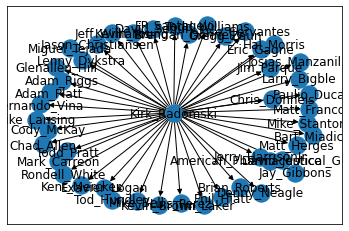

In [106]:
#Basic algorithms for breadth-first searching the nodes of a graph.
group1 = nx.bfs_tree(G, 'Kirk_Radomski')
nx.draw_networkx(group1)

### Shortest path demonstration

With visual analysis of the subgraph[1] we are able to see that there exist some path between Kirk Radomski and Jay Gibbons, if we want to find out the exact path from one node to another, we could utilize the "nx.shortest_path"

In [107]:
nx.shortest_path(G, "Kirk_Radomski","Jay_Gibbons")

['Kirk_Radomski',
 'Jerry_HarrisonJr',
 'American_Pharmaceutical_Group',
 'Jay_Gibbons']

In [108]:
nx.write_gexf(G, 'baseballsteroid.gexf')

# Section 3 - part 3 - Ego network analysis

Ego network is a special type of network consisting of one central node and all other nodes directly connected to it. The central node is known as ego, while the other surrounding nodes directly connected to it are known as alters. Ego networks are mostly used in analyzing social connections, links, and relationships. The network shown below is an illustration of Ego Network. The central node (ego) is shown as circular surrounded by the neighboring nodes (alters).


Using the Ego Networks in our Baseball steroid dataset we will demonstrate propagation of information efficiently, sensemaking from links, access to resources, efficient connection path generation, community detection, identification of the formation of groups.
Analysis of the ties among individuals for social support.

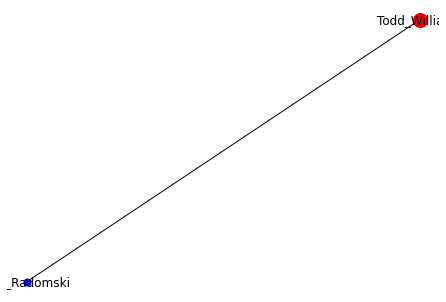

In [109]:
# Ego network
from operator import itemgetter
node_and_degree = S[0].degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(0))[-1]
hub_ego=nx.ego_graph(S[0],largest_hub)

pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=True)

# Draw ego as large and red
options = {"node_size": 200, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

Bipartite networks (or two mode networks) are a type of network in which nodes (or players) can be divided into two subsets based on the fact that there are no links between actors within each subset, only between the two. Because the performers are divided into two groups and there are no relationships between them, As we see in the whole undirected network, there are edges which exists between each and every nodes. Also after finding the largest two mode network from the first network, We will find other separate edges between the new nodes of the two mode network.

In [110]:
# finding edges of the two mode network
print(S[0].edges)

[('Miguel_Tejada', 'Kirk_Radomski'), ('Jerry_HarrisonJr', 'American_Pharmaceutical_Group'), ('Jerry_HarrisonJr', 'Kirk_Radomski'), ('Lenny_Dykstra', 'Kirk_Radomski'), ('David_Segul', 'Kirk_Radomski'), ('Mike_Bell', 'Kirk_Radomski'), ('Matt_Franco', 'Kirk_Radomski'), ('Jason_Christiansen', 'Kirk_Radomski'), ('Hal_Morris', 'Kirk_Radomski'), ('David_Justice', 'Kirk_Radomski'), ('Brian_Roberts', 'Kirk_Radomski'), ('Todd_Pratt', 'Kirk_Radomski'), ('Luis_Perez', 'Kirk_Radomski'), ('Kevin_Brown', 'Kirk_Radomski'), ('Mike_Stanton', 'Kirk_Radomski'), ('Mike_Lansing', 'Kirk_Radomski'), ('Denny_Neagle', 'Kirk_Radomski'), ('Cody_McKay', 'Kirk_Radomski'), ('Chad_Allen', 'Kirk_Radomski'), ('Todd_Williams', 'Kirk_Radomski'), ('Bart_Miadich', 'Kirk_Radomski'), ('Larry_Bigble', 'Kirk_Radomski'), ('Matt_Herges', 'Kirk_Radomski'), ('Chris_Donnels', 'Kirk_Radomski'), ('Adam_Platt', 'Kirk_Radomski'), ('Rondell_White', 'Kirk_Radomski'), ('Eric_Gagne', 'Kirk_Radomski'), ('Paulio_Duca', 'Kirk_Radomski'), ('Br

In [111]:
# add name to network
G=nx.relabel_nodes(G,attr_dict)

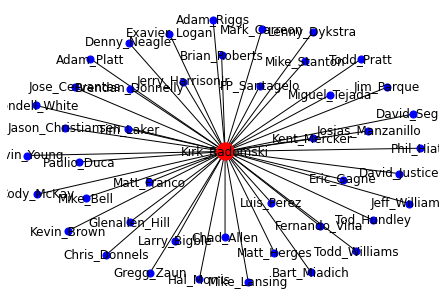

In [112]:
# Ego network
from operator import itemgetter
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
hub_ego=nx.ego_graph(G,largest_hub)

pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=True)

# Draw ego as large and red
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

###### We see in RED  the largest hub which is Kirk Radomski

# Conclusion
We have observed the subgraph[0] which is of most interest to us in the dataset, we've demonstrated through various graphics and measure how the influence of a node 'Kirk Radomski' is noteable in the network.

Social network researchers measure network activity for a node by using the concept of degrees -- the number of direct connections a node has. In the analysis above, we see the providers have the most direct connections in the network, making them the most active nodes in the network. 
Providers are a 'connector' or 'hub' in this network. Common wisdom in personal networks is "the more connections, the better." This is not always so. What really matters is where those connections lead to -- and how they connect the otherwise unconnected.

## Citation
V. Krebs, "The Spread of Steroids in Baseball." http://orgnet.com/steroids.html (2008)